In [1]:
import numpy as np
import pandas as pd

In [2]:
links=pd.read_csv(r"C:\Users\bbhav\Downloads\movie_data\links.csv")
movies=pd.read_csv(r"C:\Users\bbhav\Downloads\movie_data\movies.csv")
ratings=pd.read_csv(r"C:\Users\bbhav\Downloads\movie_data\ratings.csv")
tags=pd.read_csv(r"C:\Users\bbhav\Downloads\movie_data\tags.csv")

In [3]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### What is the shape of "movies.csv"?

In [5]:
movies.shape

(9742, 3)

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### What is the shape of "ratings.csv"?


In [7]:
ratings.shape

(100836, 4)

### How many unique "userId" are available in "ratings.csv"?


In [8]:
ratings['userId'].nunique()

610

In [9]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Which movie has recieved maximum number of user ratings?


In [10]:
# Merge ratings and movies dataframes on movieId
merged_data = pd.merge(ratings, movies, on='movieId')

# Group by movie title and count the number of ratings
ratings_count = merged_data.groupby('title').size()

# Find the movie with the maximum number of ratings
max_ratings_movie = ratings_count.idxmax()

print(f"The movie that received the maximum number of ratings is: {max_ratings_movie}")

The movie that received the maximum number of ratings is: Forrest Gump (1994)


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?


In [12]:
terminator_2_ratings = merged_data[merged_data['title'] == 'Terminator 2: Judgment Day (1991)']

# Calculate the average user rating for Terminator 2
average_rating = terminator_2_ratings['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?


In [15]:
fightClub_movie_id = movies.loc[(movies['title'] == "Fight Club (1999)")]
fightClub_movie_id

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [17]:
rating_fc=ratings[ratings["movieId"]==2959]
rating_fc

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


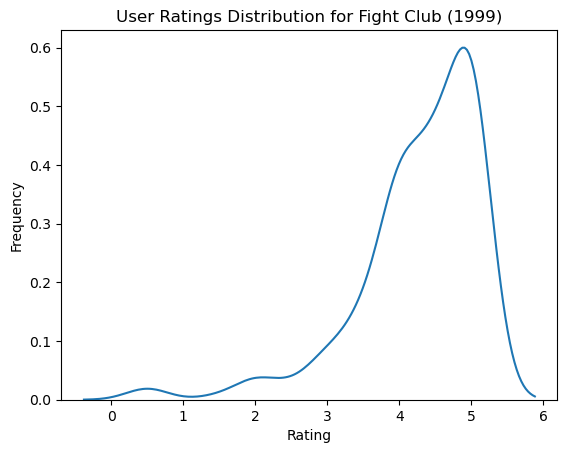

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(rating_fc["rating"])
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Which movie is the most popular based on  average user ratings?


In [20]:
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Step 2: Inner join with movies_data on movieId
merged_data1 = pd.merge(grouped_ratings, movies, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies = merged_data1[merged_data1['count'] > 50]

# Find the movie with the highest average rating among the filtered movies
most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax()]

print(f"The most popular movie based on average user ratings is: {most_popular_movie['title']} ")

The most popular movie based on average user ratings is: Shawshank Redemption, The (1994) 


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?


In [21]:
# Assuming 'filtered_movies' contains the dataframe obtained after performing the mandatory operations

# Filtering Sci-Fi movies from the filtered movies dataframe
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

# Sorting Sci-Fi movies by the number of user ratings in descending order to get the third most popular
third_most_popular_sci_fi = sci_fi_movies.nlargest(3, 'count').iloc[-1]

print(f"The third most popular Sci-Fi movie based on number of user ratings is: "
      f"{third_most_popular_sci_fi}")


The third most popular Sci-Fi movie based on number of user ratings is: movieId                                 480
count                                   238
mean                                   3.75
title                  Jurassic Park (1993)
genres     Action|Adventure|Sci-Fi|Thriller
Name: 418, dtype: object


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [22]:
# Filter tags for the movie "Matrix, The (1999)"
matrix_tags = tags[tags['movieId'].isin(movies[movies['title'] == 'Matrix, The (1999)']['movieId'])]

# Extract unique tags submitted for "Matrix, The (1999)"
unique_tags = matrix_tags['tag'].unique()

# List the unique tags submitted for "Matrix, The (1999)"
print("Tags submitted for 'Matrix, The (1999)':")
print(unique_tags)


Tags submitted for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### Mention the movieId of the movie which has the highest IMDB rating.


In [24]:
merg_m_l_df= pd.merge(filtered_movies, links, on='movieId', how='inner')
merg_m_l_df

,movieId,count,mean,title,genres,imdbId,tmdbId
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,6,102,3.946078,Heat (1995),Action|Crime|Thriller,113277,949.0
4,7,54,3.185185,Sabrina (1995),Comedy|Romance,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,54,3.916667,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,993846,106646.0
432,109374,52,3.778846,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2278388,120467.0
433,109487,73,3.993151,Interstellar (2014),Sci-Fi|IMAX,816692,157336.0
434,112852,59,4.050847,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2015381,118340.0


In [25]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
merged_rating_df = pd.merge(merg_m_l_df, ratings, on='movieId', how='inner')
merged_rating_df

,movieId,count,mean,title,genres,imdbId,tmdbId,userId,rating,timestamp
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703
1,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962
2,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7,4.5,1106635946
3,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15,2.5,1510577970
4,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17,4.5,1305696483
...,...,...,...,...,...,...,...,...,...,...
40655,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,1431045,293660.0,561,2.0,1491095067
40656,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,1431045,293660.0,586,4.0,1529899267
40657,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,1431045,293660.0,596,4.0,1535709074
40658,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,1431045,293660.0,599,3.5,1519457935


In [27]:
avg_rating = merged_rating_df.groupby('movieId')['rating'].mean().reset_index()
avg_rating

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,6,3.946078
4,7,3.185185
...,...,...
431,106782,3.916667
432,109374,3.778846
433,109487,3.993151
434,112852,4.050847


In [30]:
highest_IMDB_rating = avg_rating.loc[avg_rating['rating'].idxmax()]
print("MovieId of the movie with the highest average user rating:", highest_IMDB_rating['movieId'])

MovieId of the movie with the highest average user rating: 318.0


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.


In [32]:
sci_fi_movies = merged_rating_df[merged_rating_df['genres'].str.contains('Sci-Fi')]
sci_fi_movies

,movieId,count,mean,title,genres,imdbId,tmdbId,userId,rating,timestamp
1137,32,177,3.983051,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0,4,2.0,945173447
1138,32,177,3.983051,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0,6,4.0,845553426
1139,32,177,3.983051,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0,8,3.0,839463624
1140,32,177,3.983051,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0,14,4.0,835441168
1141,32,177,3.983051,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0,18,4.0,1455209840
...,...,...,...,...,...,...,...,...,...,...
40655,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,1431045,293660.0,561,2.0,1491095067
40656,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,1431045,293660.0,586,4.0,1529899267
40657,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,1431045,293660.0,596,4.0,1535709074
40658,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,1431045,293660.0,599,3.5,1519457935


In [33]:
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]
highest_rated_sci_fi_movie

print("MovieId of the highest rated Sci-Fi movie:", highest_rated_sci_fi_movie['movieId'])

MovieId of the highest rated Sci-Fi movie: 32


In [34]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find("sc-bde20123-1 cMEQkK", attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan
imdbId = "0111161"  # Replace with the IMDb ID you want to scrape
rating = scrapper(imdbId)
print("IMDb Rating:", rating)

IMDb Rating: nan
